In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

# 데이터 로드

In [2]:
df = pd.read_csv("data/suggestion.csv")

df.shape

(118, 8)

## 데이터 미리보기

In [3]:
df.head()

,sgId,title,category,content,start,end,vote,author
0,1,어린이집 차량내 어린이 질식사고 등에 대한 상세한 대책이 필요하다.,안전,"최근 동두천 어린이집 차량내 어린이 질식사고가 발생하여, 이에 대한 여러가지 대책을...",2018.07.24,2018.08.23,14,헌비
1,28,성희롱 없는 세상,안전,현재 우리 사회에서 익숙해진 대형 범죄가 있습니다.바로 몰래카메라입니다.현재 공공건...,2018.08.31,2018.11.28,3,장대연
2,26,행정안전부소속의 온라인 일자리뱅크운영,상생협력,정부각부처에서는 제각각 일자리창출에 혼신의 힘을 쏟고 있습니다.문제는 제각각하다보니...,2018.08.28,2018.11.25,4,생태조성
3,25,"농어업,농어촌 특별위원회 설치",국민참여,청년실업률이 높아지고 일자리 찾기는 점점 어려워지면서농업과 농촌으로 눈을 돌리는 분...,2018.08.19,2018.11.16,15,생태조성
4,24,혁신적인 귀농창업교육의 패러다임 제시,공동체,"농촌의 생력을 불어넣을 대안으로 귀농귀촌지원정책은 정부,지자체,농협등의 관련기관들이...",2018.08.16,2018.11.13,5,생태조성


## 요약

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
sgId        118 non-null int64
title       118 non-null object
category    118 non-null object
content     117 non-null object
start       118 non-null object
end         118 non-null object
vote        118 non-null int64
author      116 non-null object
dtypes: int64(2), object(6)
memory usage: 7.5+ KB


In [5]:
df.describe()

,sgId,vote
count,118.000000,118.000000
mean,73.872881,59.423729
std,47.241251,264.967162
min,1.000000,0.000000
25%,33.250000,2.000000
50%,66.500000,5.000000
75%,122.750000,8.750000
max,153.000000,2037.000000


In [6]:
df['category'].value_counts()

기타       22
일반행정     21
보건복지     16
안전       15
상생협력     10
인권/평등     9
국민참여      7
반부패청렴     6
사회통합      5
환경        5
공동체       2
Name: category, dtype: int64

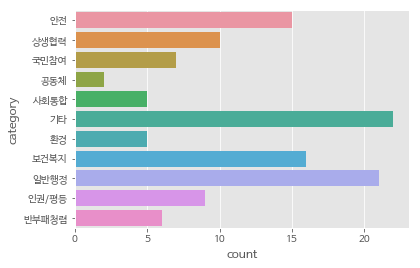

In [7]:
# 카테고리별 제안수
sns.countplot(data=df, y="category")

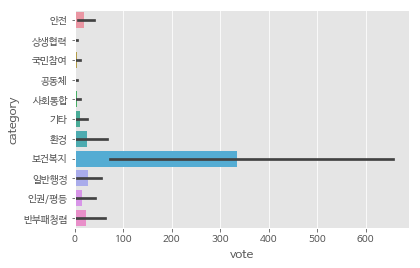

In [8]:
# 카테고리별 평균 투표수
sns.barplot(data=df, x="vote", y="category")

In [9]:
# 카테고리별 전체 투표수
df_category_vote = pd.DataFrame(df.groupby(['category'])['vote'].sum()).reset_index().sort_values('vote', ascending=False)
df_category_vote.head()

,category,vote
4,보건복지,5367
9,일반행정,578
7,안전,293
2,기타,252
3,반부패청렴,145


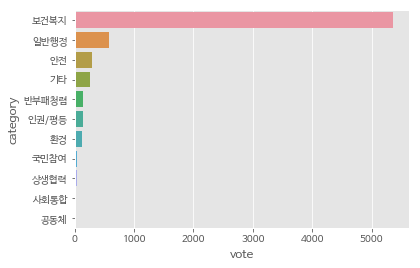

In [10]:
sns.barplot(data=df_category_vote, x="vote", y="category")

# 기간

In [11]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

df[['start', 'end']].head()

,start,end
0,2018-07-24,2018-08-23
1,2018-08-31,2018-11-28
2,2018-08-28,2018-11-25
3,2018-08-19,2018-11-16
4,2018-08-16,2018-11-13


In [12]:
df['start-date'] = df['start'].dt.date
df['start-month'] = df['start'].dt.year.astype(str) +"-"+ df['start'].dt.month.astype(str)
df['start-weekday'] = df['start'].dt.dayofweek

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.dt.dayofweek.html

In [13]:
weekday_map= {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
df['weekday'] = df['start-weekday'].apply(lambda x : weekday_map[x])
df[['start-month', 'start-weekday', 'weekday']].head()

,start-month,start-weekday,weekday
0,2018-7,1,화
1,2018-8,4,금
2,2018-8,1,화
3,2018-8,6,일
4,2018-8,3,목


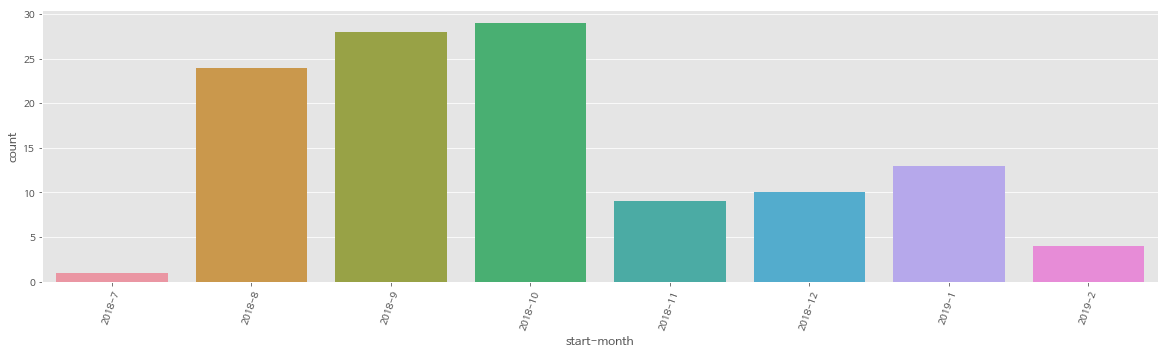

In [14]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=70) 
sns.countplot(data=df, x="start-month")

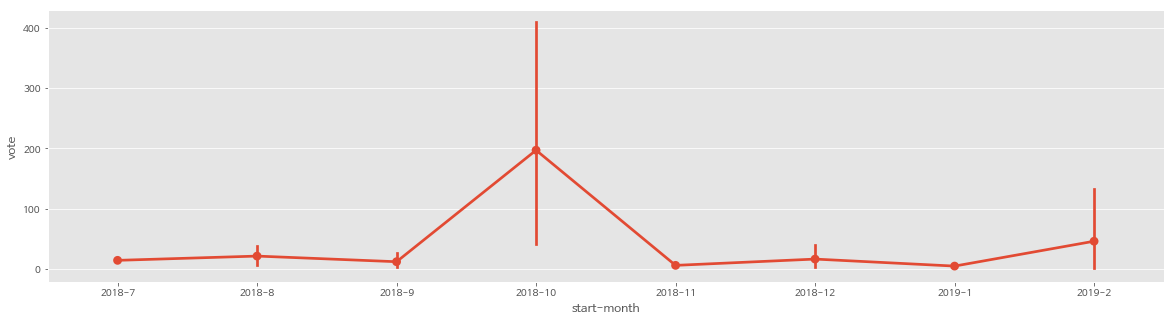

In [15]:
plt.figure(figsize=(20,5))
sns.pointplot(data=df, x="start-month", y="vote")

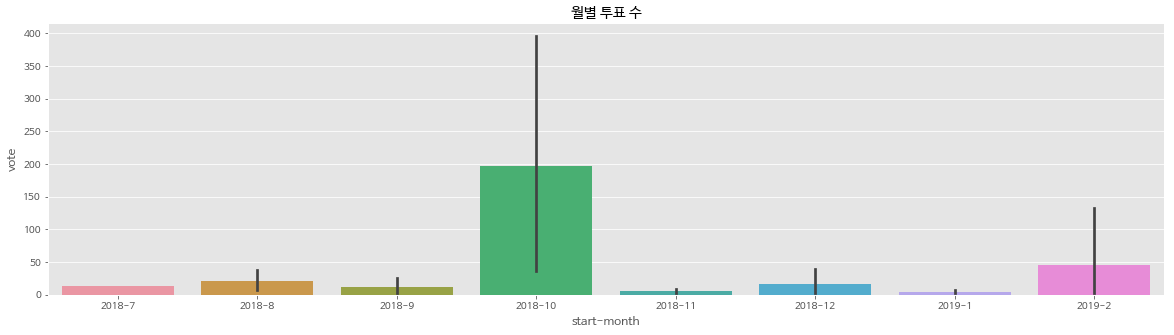

In [16]:
plt.figure(figsize=(20,5))
plt.title('월별 투표 수')
sns.barplot(data=df, x="start-month", y="vote")

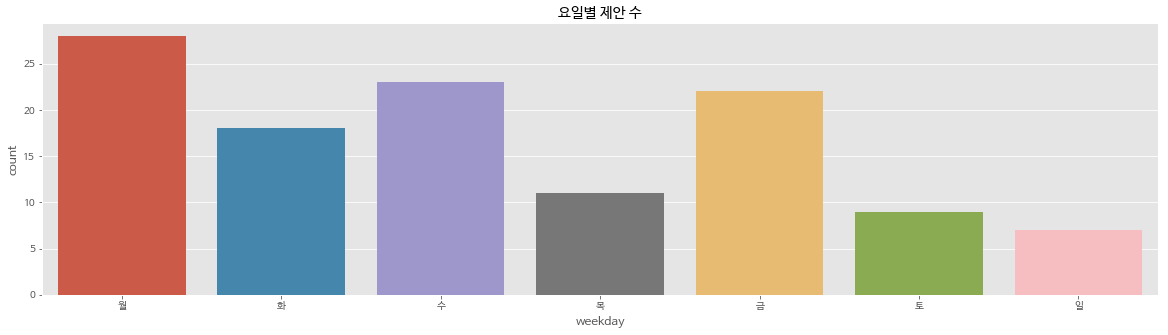

In [17]:
plt.figure(figsize=(20,5))
plt.title('요일별 제안 수')
sns.countplot(data=df.sort_values(by="start-weekday"), x="weekday")

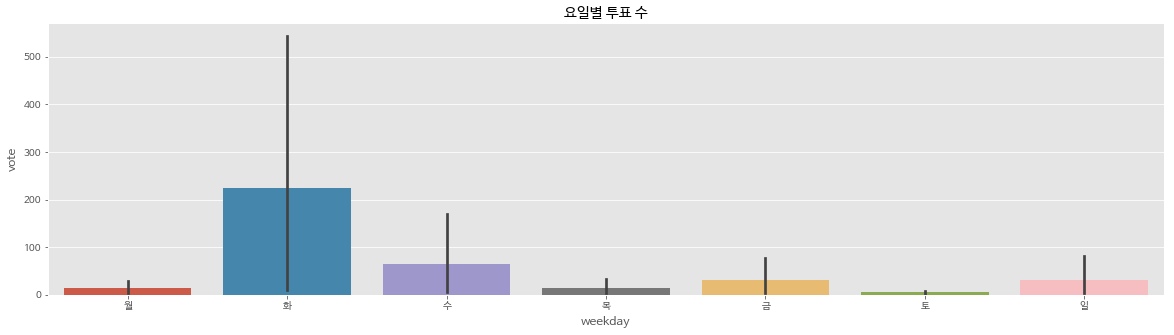

In [18]:
plt.figure(figsize=(20,5))
plt.title('요일별 투표 수')
sns.barplot(data=df.sort_values(by="start-weekday"), x="weekday", y="vote")

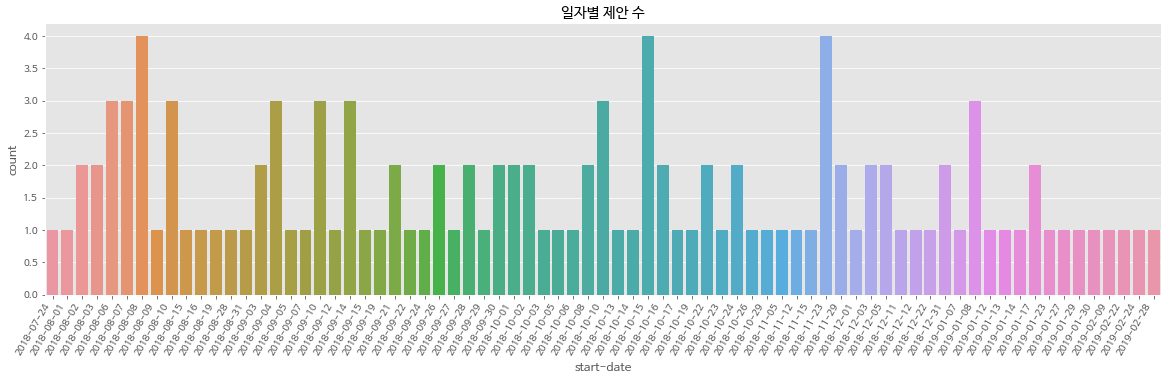

In [19]:
plt.figure(figsize=(20,5))
plt.title('일자별 제안 수')
plt.xticks(rotation=60, ha='right')
sns.countplot(data=df.sort_values(by="start-date"), x="start-date")

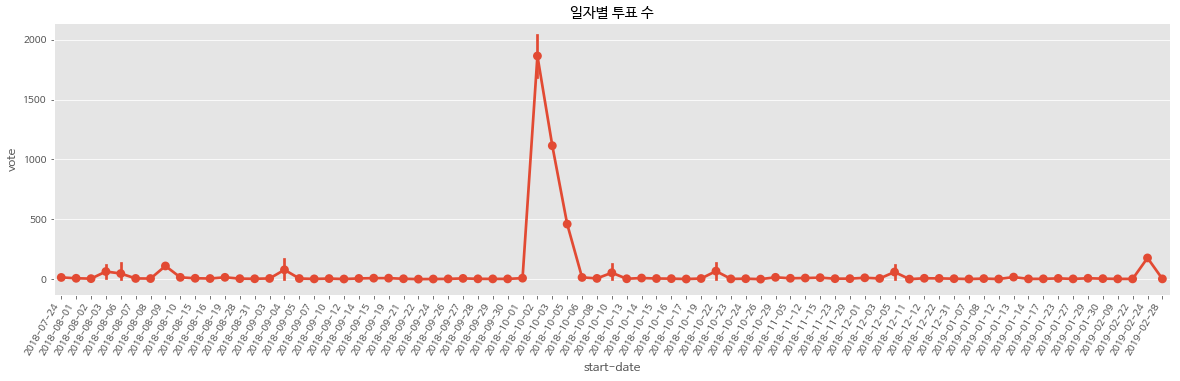

In [20]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('일자별 투표 수')
sns.pointplot(data=df.sort_values(by="start-date"), x="start-date", y="vote")

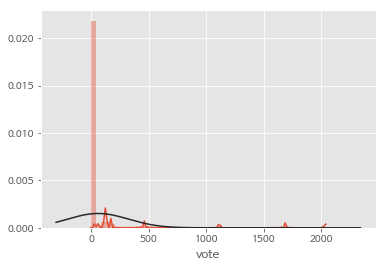

In [21]:
from scipy.stats import norm
sns.distplot(df['vote'], fit=norm)

In [22]:
# 종료된 제안 수
df[df['end'] < '2019-03-01'].shape

(92, 12)

In [23]:
# 종료 여부 컬럼 생성
df['close'] = df['end'] < '2019-03-01'

In [24]:
# 종료 여부 건 비교
df['close'].value_counts()

True     92
False    26
Name: close, dtype: int64

In [25]:
df.sort_values(by='vote', ascending=False).head()

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
78,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2018-10-02,2018-12-30,2037,엄마란소리,2018-10-02,2018-10,1,화,True
79,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",2018-10-02,2018-12-30,1693,곰돌이네,2018-10-02,2018-10,1,화,True
77,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,2018-10-03,2018-12-31,1115,알지온,2018-10-03,2018-10,2,수,True
76,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,2018-10-05,2019-01-02,460,매덩이,2018-10-05,2018-10,4,금,True
115,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,2019-02-24,2019-05-24,177,무한소,2019-02-24,2019-2,6,일,False


In [26]:
# 가장 많은 건 수가 있는 일반행정 분야의 제안을 투표수 별로 정렬해서 봅니다.
df[df['category'] == '일반행정'].sort_values(by='vote', ascending=False).head()

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
115,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,2019-02-24,2019-05-24,177,무한소,2019-02-24,2019-2,6,일,False
49,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,2018-09-04,2018-12-02,167,NaN,2018-09-04,2018-9,1,화,True
71,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,2018-10-10,2019-01-07,126,안전역량,2018-10-10,2018-10,2,수,True
70,72,정부부처 공모사업을 한눈에 보고싶습니다.,일반행정,저는 지자체에서 혁신업무 및 기획업무를 담당하고있습니다.작은 지방이라 공모사업 선정...,2018-10-10,2019-01-07,33,혁신선두,2018-10-10,2018-10,2,수,True
68,75,"서울특별시청소년수련관 직원정년나이 ,기관장(대표)과 같게 조례변경이 되어야 합니다",일반행정,"​지역사회에 청소년을 위한 문화공간 ,여가선용을통한 자아계발을 목적으로 설립한 청소...",2018-10-14,2019-01-11,9,백희,2018-10-14,2018-10,6,일,True


## WordCloud

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor = 'white', width=1600, height=800):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [28]:
# nan 값이 있어 결측치를 채워줄 필요가 있다.
df.loc[63]

sgId                                  80
title            정부통합 일자리 창출 '통합 플랫폼' 구축
category                            국민참여
content                              NaN
start                2018-10-16 00:00:00
end                  2019-01-13 00:00:00
vote                                   6
author                               스마트
start-date                    2018-10-16
start-month                      2018-10
start-weekday                          1
weekday                                화
close                               True
Name: 63, dtype: object

In [29]:
from konlpy.tag import Mecab
mecab = Mecab()

In [30]:
%time mecab_content_nouns = mecab.nouns(''.join(str(df['content'].fillna(''))))
mecab_content_nouns[-10:]

CPU times: user 21.6 ms, sys: 8.31 ms, total: 29.9 ms
Wall time: 31 ms


['채용', '인원', '명', '담', '당', '업', '함주', '공원', '공설', '운동장']

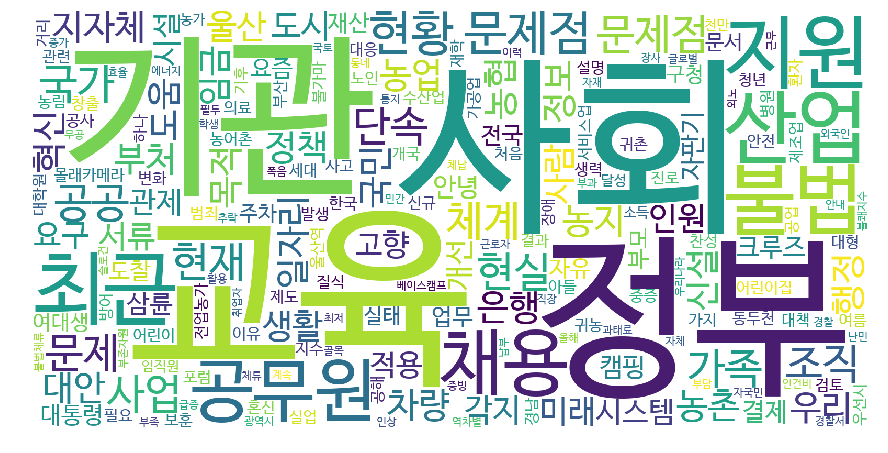

In [31]:
displayWordCloud(' '.join(mecab_content_nouns))

CPU times: user 8.26 ms, sys: 706 µs, total: 8.96 ms
Wall time: 10.3 ms


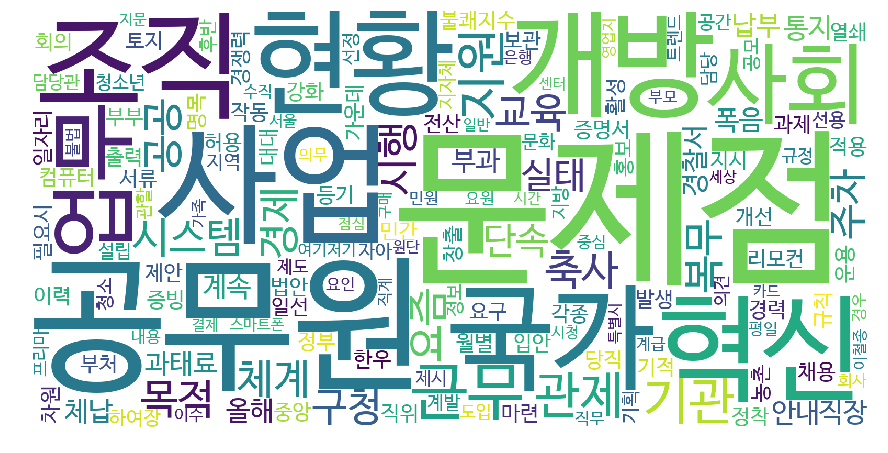

In [32]:
%time mecab_gov_nouns = mecab.nouns(''.join(str(df.loc[df['category'] == "일반행정", "content"].fillna(''))))
displayWordCloud(' '.join(mecab_gov_nouns))

CPU times: user 5.01 ms, sys: 503 µs, total: 5.51 ms
Wall time: 5.44 ms


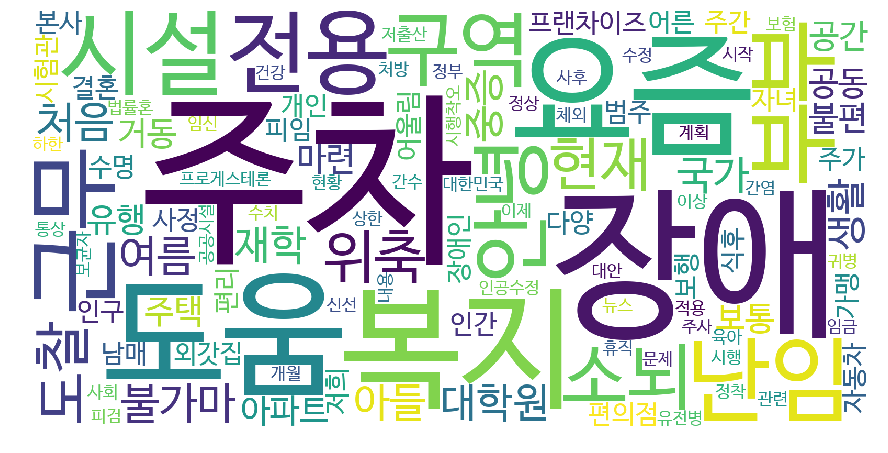

In [33]:
%time mecab_health_nouns = mecab.nouns(''.join(str(df.loc[df['category'] == "보건복지", "content"].fillna(''))))
displayWordCloud(' '.join(mecab_health_nouns))

CPU times: user 5.05 ms, sys: 394 µs, total: 5.45 ms
Wall time: 5.39 ms


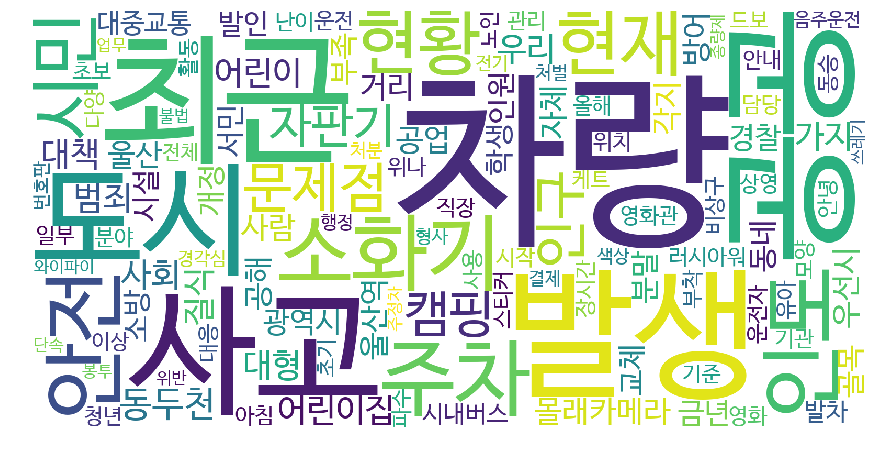

In [34]:
%time mecab_health_nouns = mecab.nouns(''.join(str(df.loc[df['category'] == "안전", "content"].fillna(''))))
displayWordCloud(' '.join(mecab_health_nouns))

CPU times: user 6.61 ms, sys: 591 µs, total: 7.2 ms
Wall time: 7.17 ms


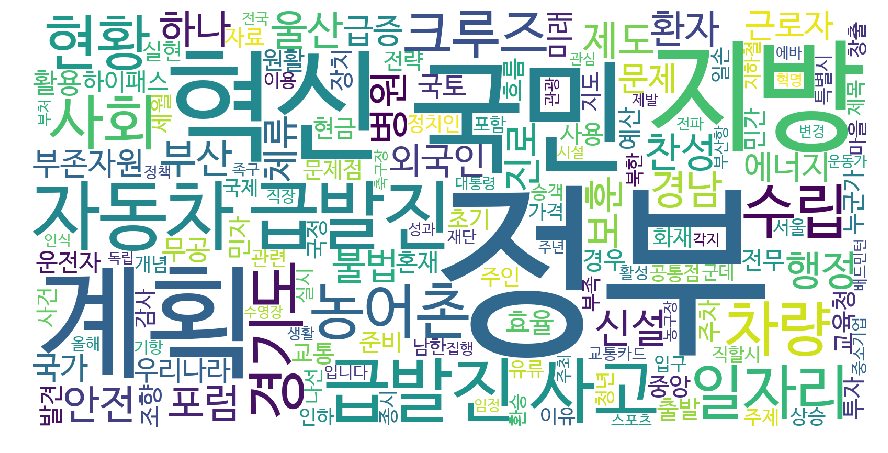

In [35]:
%time mecab_health_nouns = mecab.nouns(''.join(str(df.loc[df['category'] == "기타", "content"].fillna(''))))
displayWordCloud(' '.join(mecab_health_nouns))

In [36]:
import re
p = r'.*(난임|불임|임신).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(4, 13)

In [37]:
care.sort_values(by="vote", ascending=False)

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
78,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2018-10-02,2018-12-30,2037,엄마란소리,2018-10-02,2018-10,1,화,True
79,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",2018-10-02,2018-12-30,1693,곰돌이네,2018-10-02,2018-10,1,화,True
77,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,2018-10-03,2018-12-31,1115,알지온,2018-10-03,2018-10,2,수,True
69,74,산부인과 초음파비용,보건복지,결혼한 후 1년이내 피임을 하지않는범주에서 자녀가생기지 않으면 난임부부라고 말합니다...,2018-10-13,2019-01-10,3,모모,2018-10-13,2018-10,5,토,True


CPU times: user 3.51 ms, sys: 255 µs, total: 3.77 ms
Wall time: 3.85 ms


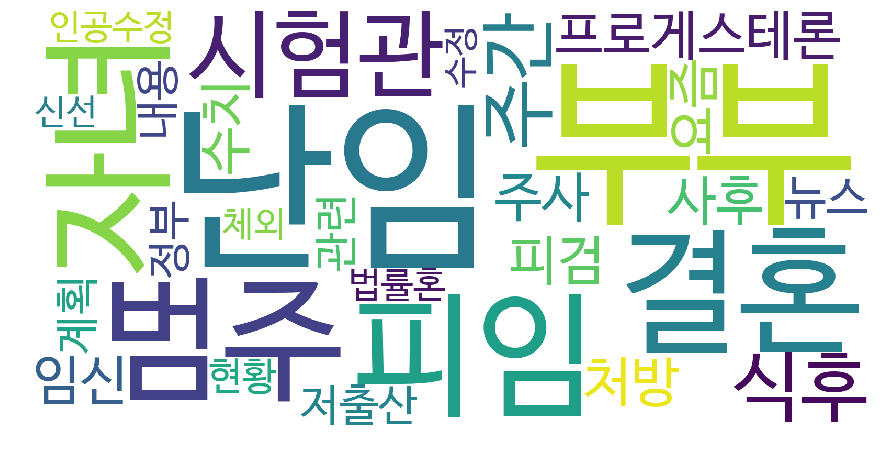

In [38]:
%time mecab_care_nouns = mecab.nouns(''.join(str(care["content"].fillna(''))))
displayWordCloud(' '.join(mecab_care_nouns))

In [39]:
p = r'.*(미세먼지).*'
air = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
air

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
34,52,저속으로 이용되고 있는 수도권 고속도로 운영방식 개선,기타,(현 황)정부에서는 교통의 원활한 흐름을 위해 정부예산 또는 민간투자(민자)를 ...,2018-09-22,2018-12-20,0,사회적가치,2018-09-22,2018-9,5,토,True


In [40]:
p = r'.*(자동차).*'
car = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
car

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
35,51,아파트 복도 창문을 활짝 열고 싶어요.,환경,"""특별피난계단의 계단실 및 부속실 제연설비의 화재안전기준""(소방방재청 고시) 제21...",2018-09-21,2018-12-19,1,국민소통,2018-09-21,2018-9,4,금,True
50,31,사회적인 문제점 자동차급발진사고와 BMW 화재 사건에 대해서~~~,기타,사회적인 문제점 자동차급발진사고와 BMW 화재 사건에 대해서~~~자동차급발진사고은 ...,2018-09-04,2018-12-02,3,해오름,2018-09-04,2018-9,1,화,True
54,108,자동차급발진사고에 대해서~~~,기타,"국정감사 자료에 의하면""6년간 자동차급발진사고 449건""이렇게 많이 생긴것을 왜? ...",2018-10-26,2019-01-23,0,해오름,2018-10-26,2018-10,4,금,True
74,68,장애인전용주차구역 단속 의견진술 처리의 공정성 제고방안 제도개선,보건복지,장애인 전용 주차구역은 보행장애인이 자동차를 편리하게 주차할 수 있는 전용주차구역을...,2018-10-08,2019-01-05,1,소피라테스,2018-10-08,2018-10,0,월,True
86,121,국가유공자에 대한 대우,반부패청렴,﻿★﻿국가유공자☆​나﻿라를 위해 목숨을 바쳐서 현재까지 이렇게 전쟁의 공포나 기근 ...,2018-11-23,2019-02-20,1,선한사마리아girl,2018-11-23,2018-11,4,금,True
112,138,각 시.구청 불법주정차위반 단속차량에 도로 포트홀 업무 추가 제안,안전,현황 및 문제점1.현재는 불법주정차 차량 위반 단속 업무만 합니다.2.가끔씩 보면 ...,2019-01-08,2019-04-07,2,걷자,2019-01-08,2019-1,1,화,False
